In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset and removing the null values from relevant columns

In [55]:
movies_df = pd.read_csv("movie_dataset.csv")

In [56]:
movies_df.shape

(4803, 24)

In [57]:
movies_df.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [58]:
# only genres, director, budget and vote_average are the column of interest as we will only use these columns to analyse the popularity of movies
columns_of_interest = ["genres", "director", "budget", "vote_average"]

# Droping rows with null values in columns of interest
movies_df = movies_df.dropna(subset=columns_of_interest)


In [59]:
movies_df.shape

(4759, 24)

## Preparing the data which can be used in tableau

- In the current dataset the genres column contains a string which has the genres of the movie seperated by a blank space. We can not use this directly in tableau and gephi. So we will first create a new dataframe with only a single genre per row. This will be done by duplicating the entire rows but each time setting the distinct genre from the entire string of different genres of that particular movie. This new dataframe will be called updated_movies_df

In [60]:
# Splitting the genres into separate rows
updated_movies_df = movies_df.assign(genres=movies_df['genres'].str.split()).explode('genres')

In [61]:
updated_movies_df["genres"].head(8)

0       Action
0    Adventure
0      Fantasy
0      Science
0      Fiction
1    Adventure
1      Fantasy
1       Action
Name: genres, dtype: object

In [62]:
updated_movies_df.shape

(12624, 24)

In [63]:
updated_csv_file = "updated_movies_data.csv"  # Replace with the desired file path

# Save the updated DataFrame to a new CSV file
updated_movies_df.to_csv(updated_csv_file, index=False)

# Now, your updated DataFrame is saved to the specified CSV file.


## Preparing the edges table which will can be used by gephi

- In gephi we want to visualize the network of directors and gernes. So in the edge table we will have source as the genre and the target as director. So the edge will be directed from genre to director. Also the edge weight is decided based on the number of time the director creates a movie of specific genre.

In [70]:
# Count the number of occurrences of each director-genre pair
edge_weights = updated_movies_df.groupby(['director', 'genres']).size().reset_index(name='Weight')

# Create a DataFrame with edges (Source, Target, and Edge Weight columns)
edges_data = pd.DataFrame({
    'Source': edge_weights['genres'],
    'Target': edge_weights['director'],
    'Weight': edge_weights['Weight']
})

# Save the DataFrame to a CSV file
edges_data.to_csv('edges.csv', index=False)


## Plots for statistical analyisis of the popularity(Vote average) of the movie.

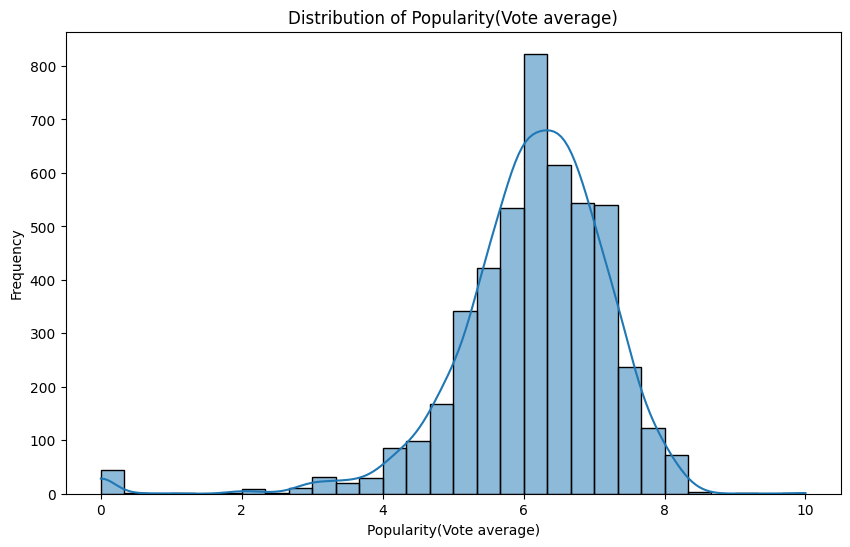

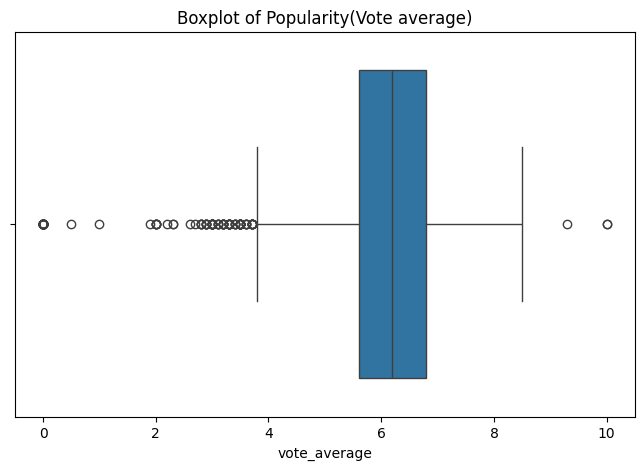

count    4759.000000
mean        6.118071
std         1.123471
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64
Mean Popularity: 6.118071023324228
Median Popularity: 6.2
Standard Deviation of Popularity: 1.1234709745622826


In [66]:
# Descriptive statistics
popularity_stats = movies_df['vote_average'].describe()

# Mean, median, standard deviation
mean_popularity = popularity_stats['mean']
median_popularity = popularity_stats['50%']  # 50% corresponds to the median
std_popularity = popularity_stats['std']

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['vote_average'], bins=30, kde=True)
plt.title('Distribution of Popularity(Vote average)')
plt.xlabel('Popularity(Vote average)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=movies_df['vote_average'])
plt.title('Boxplot of Popularity(Vote average)')
plt.show()

# Display descriptive statistics
print(popularity_stats)

# Inferences
print(f"Mean Popularity: {mean_popularity}")
print(f"Median Popularity: {median_popularity}")
print(f"Standard Deviation of Popularity: {std_popularity}")


## Plots for visualizing the relations between directors and the average popularities of their movies.

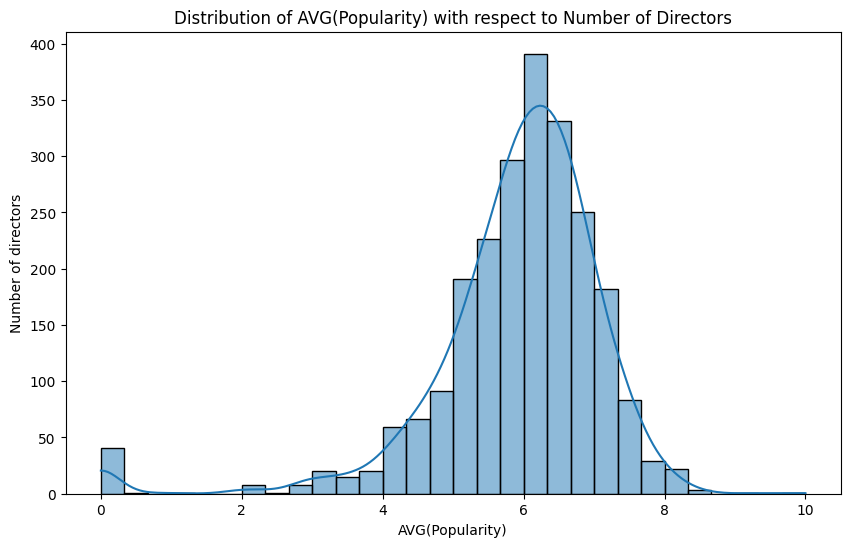

count    2338.000000
mean        5.900950
std         1.253628
min         0.000000
25%         5.400000
50%         6.100000
75%         6.633333
max        10.000000
Name: vote_average, dtype: float64


In [72]:
# Plot for count of directors with respect to the Avg(popularity) of their movies


# Group by the number of directors and calculate the average popularity for each group
directors_avg_popularity = movies_df.groupby('director')['vote_average'].mean().reset_index()

# Descriptive statistics for average popularity
avg_popularity_stats = directors_avg_popularity['vote_average'].describe()

# Mean, median, standard deviation for average popularity
mean_avg_popularity = avg_popularity_stats['mean']
median_avg_popularity = avg_popularity_stats['50%']  # 50% corresponds to the median
std_avg_popularity = avg_popularity_stats['std']

# Visualization for distribution of AVG(Popularity) with respect to the number of directors
plt.figure(figsize=(10, 6))
sns.histplot(directors_avg_popularity['vote_average'], bins=30, kde=True)
plt.title('Distribution of AVG(Popularity) with respect to Number of Directors')
plt.xlabel('AVG(Popularity)')
plt.ylabel('Number of directors')
plt.show()

# Display descriptive statistics
print(avg_popularity_stats)


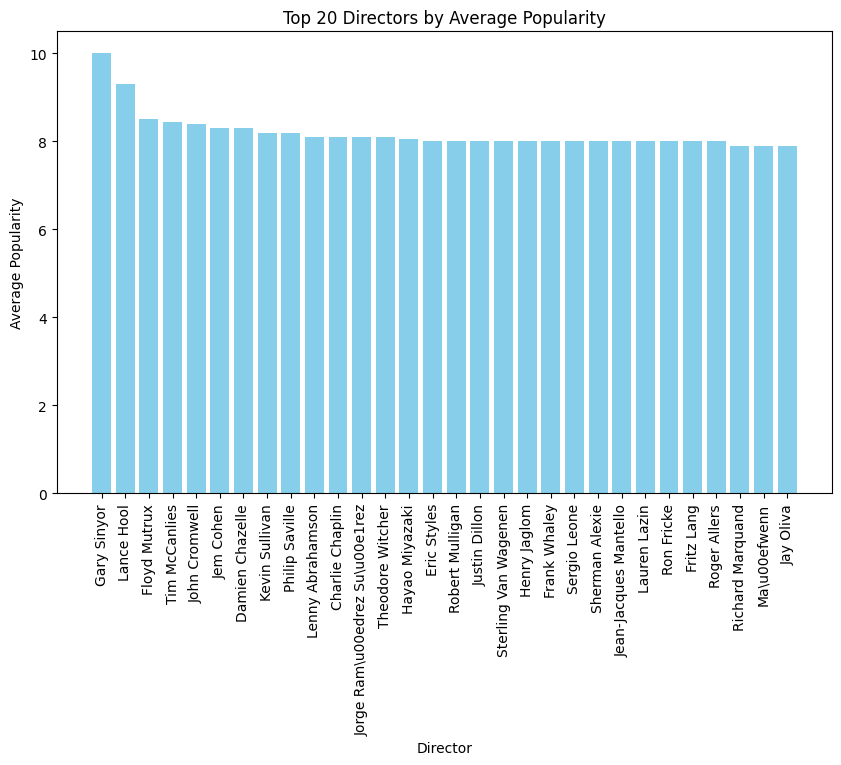

In [33]:
# Plot for top20 directos by their average popularity.

# Group by 'Director' and calculate the average popularity
director_avg_popularity = movies_df.groupby('director')['vote_average'].mean().reset_index()

# Sort the directors based on average popularity in descending order
sorted_directors = director_avg_popularity.sort_values(by='vote_average', ascending=False).head(30)

# Create the bar chart for the top 20 directors
plt.figure(figsize=(10, 6))
plt.bar(sorted_directors['director'], sorted_directors['vote_average'], color='skyblue')
plt.xlabel('Director')
plt.ylabel('Average Popularity')
plt.title('Top 20 Directors by Average Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


## Plots for visualizing the relations between genres and the average popularities

In [73]:
genres = updated_movies_df["genres"].unique()

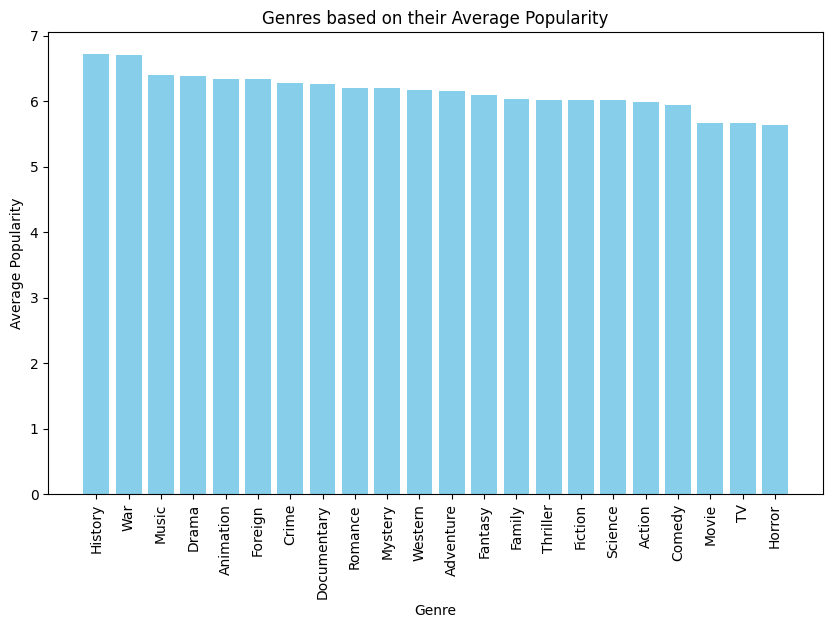

         genres  vote_average
11      History      6.719797
20          War      6.714085
14        Music      6.397802
6         Drama      6.392056
2     Animation      6.339914
10      Foreign      6.334375
4         Crime      6.283165
5   Documentary      6.272222
16      Romance      6.203604
15      Mystery      6.200289
21      Western      6.175000
1     Adventure      6.156962
8       Fantasy      6.093541
7        Family      6.034387
19     Thriller      6.021463
9       Fiction      6.019849
17      Science      6.019849
0        Action      5.996177
3        Comedy      5.942274
13        Movie      5.662500
18           TV      5.662500
12       Horror      5.631660


In [75]:
# Group by 'genre' and calculate the average popularity
genre_avg_popularity = updated_movies_df.groupby('genres')['vote_average'].mean().reset_index()

# Sort the generes based on average popularity in descending order
sorted_genres = genre_avg_popularity.sort_values(by='vote_average', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_genres['genres'], sorted_genres['vote_average'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Genres based on their Average Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

print(sorted_genres)


## Bias handling in analysis of directors vs average(Popularities) caused by the genres

As we saw above that for some genres the average popularities is higher from other. So it might happen that because some directors creates movies of some particular group of genres only which have on average high popularity then this will be reflected as the popularity being dependent on that director more even if that's not the case. So inshort genres can cause biases while visualizing the relation between directors and average(Popularity).

To handle this instead of calculating average popularity we can calculate weighted average popularity for each director. So the popularity of each movie will first be weighted based on the genre of that movie and then it will be added for calculating the average.

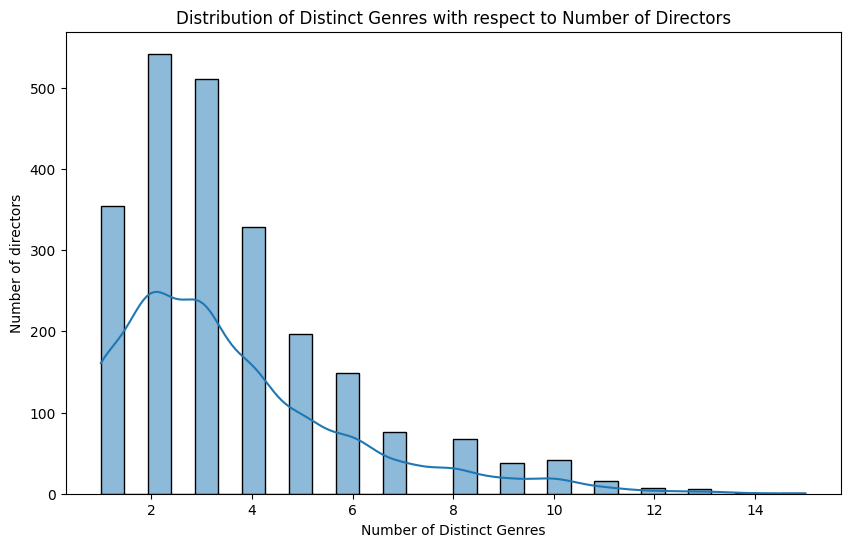

count    2338.000000
mean        3.580838
std         2.306177
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        15.000000
Name: genres, dtype: float64


In [109]:
# Count the number of distinct genres for each director
distinct_genres_by_director = updated_movies_df.groupby('director')['genres'].nunique().reset_index()

# Descriptive statistics for the number of distinct genres
distinct_genres_stats = distinct_genres_by_director['genres'].describe()

# Mean, median, standard deviation for the number of distinct genres
mean_distinct_genres = distinct_genres_stats['mean']
median_distinct_genres = distinct_genres_stats['50%']  # 50% corresponds to the median
std_distinct_genres = distinct_genres_stats['std']

# Visualization for distribution of the number of distinct genres with respect to the number of directors
plt.figure(figsize=(10, 6))
sns.histplot(distinct_genres_by_director['genres'], bins=30, kde=True)
plt.title('Distribution of Distinct Genres with respect to Number of Directors')
plt.xlabel('Number of Distinct Genres')
plt.ylabel('Number of directors')
plt.show()

# Display descriptive statistics
print(distinct_genres_stats)


This we can see that their is a clear bias that the directors only creates movies in a certain small cluster of genrs.

So for tackling this bias we will use weights calculated using the popularity of the gerne.

In [103]:
genre_weights = sorted_genres.set_index('genres')['vote_average'].apply(lambda x: 1/x).to_dict()


# Normalize the weights to ensure they sum to 1
total_weight = sum(genre_weights.values())
normalized_weights = {genre: weight / total_weight for genre, weight in genre_weights.items()}

# Scale the normalized weights to the desired range (0 to 10)
min_scale = 0
max_scale = 10
scaled_weights = {genre: min_scale + (max_scale - min_scale) * weight for genre, weight in normalized_weights.items()}


genre_weights = scaled_weights
# Display the final scaled weights
# print(scaled_weights)


In [104]:
genre_weights

{'History': 0.41504510908260267,
 'War': 0.4153982359011351,
 'Music': 0.4359338994373085,
 'Drama': 0.4363257950634851,
 'Animation': 0.4399142935015862,
 'Foreign': 0.4402989813385685,
 'Crime': 0.4438875395351204,
 'Documentary': 0.44466199715231974,
 'Romance': 0.44958044358224064,
 'Mystery': 0.44982078288869015,
 'Western': 0.45166297326582905,
 'Adventure': 0.4529862046328188,
 'Fantasy': 0.4577008690059655,
 'Family': 0.4621875755281804,
 'Thriller': 0.46317963376566995,
 'Fiction': 0.4633038081004319,
 'Science': 0.4633038081004319,
 'Action': 0.4651328253975723,
 'Comedy': 0.46935210919014697,
 'Movie': 0.492541962016158,
 'TV': 0.492541962016158,
 'Horror': 0.49523919149758133}

In [105]:
# code for creating a new column which will contain the weights with whcih the popularity will be multiplied with.

# Split the 'genres' column into a list of genres
movies_df['genres_list'] = movies_df['genres'].str.split()

# Define a function to calculate the weighted average
def calculate_weighted_average(genres_list):
    total_genres = len(genres_list)
    if total_genres == 0:
        return 0  # Return 0 if the list is empty to avoid division by zero
    
    weight = 0
    for genre in genres_list:
        weight = weight + genre_weights[genre]
    average_weight = weight / total_genres
    return average_weight

# Apply the function to create the new column 'weighted_average'
movies_df['popularity_weights'] = movies_df['genres_list'].apply(calculate_weighted_average)

# Display the updated DataFrame
print(movies_df[['genres_list', 'popularity_weights']])


                                         genres_list  popularity_weights
0     [Action, Adventure, Fantasy, Science, Fiction]            0.460486
1                       [Adventure, Fantasy, Action]            0.458607
2                         [Action, Adventure, Crime]            0.454002
3                   [Action, Crime, Drama, Thriller]            0.452131
4              [Action, Adventure, Science, Fiction]            0.461182
...                                              ...                 ...
4797                             [Foreign, Thriller]            0.451739
4798                       [Action, Crime, Thriller]            0.457400
4799                               [Comedy, Romance]            0.459466
4800             [Comedy, Drama, Romance, TV, Movie]            0.468068
4802                                   [Documentary]            0.444662

[4759 rows x 2 columns]


In [106]:
# Create a new column 'Weighted_Popularity' in the DataFrame
movies_df['Weighted_Popularity'] = movies_df.apply(lambda row: row['vote_average'] * row['popularity_weights'], axis=1)


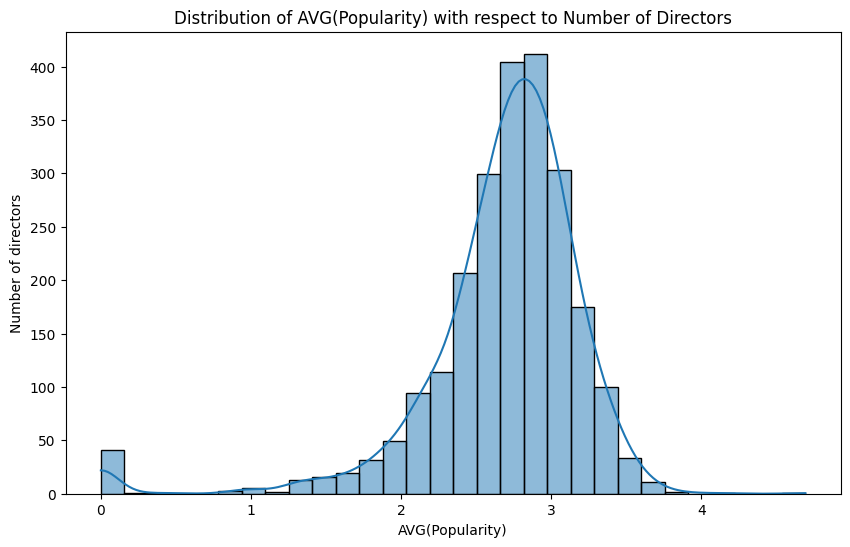

count    2338.000000
mean        2.678512
std         0.553499
min         0.000000
25%         2.488928
50%         2.762192
75%         2.993326
max         4.693521
Name: Weighted_Popularity, dtype: float64


In [107]:
# Plot for count of directors with respect to the Avg(popularity) of their movies


# Group by the number of directors and calculate the average popularity for each group
directors_avg_popularity = movies_df.groupby('director')['Weighted_Popularity'].mean().reset_index()

# Descriptive statistics for average popularity
avg_popularity_stats = directors_avg_popularity['Weighted_Popularity'].describe()

# Mean, median, standard deviation for average popularity
mean_avg_popularity = avg_popularity_stats['mean']
median_avg_popularity = avg_popularity_stats['50%']  # 50% corresponds to the median
std_avg_popularity = avg_popularity_stats['std']

# Visualization for distribution of AVG(Popularity) with respect to the number of directors
plt.figure(figsize=(10, 6))
sns.histplot(directors_avg_popularity['Weighted_Popularity'], bins=30, kde=True)
plt.title('Distribution of AVG(Popularity) with respect to Number of Directors')
plt.xlabel('AVG(Popularity)')
plt.ylabel('Number of directors')
plt.show()

# Display descriptive statistics
print(avg_popularity_stats)


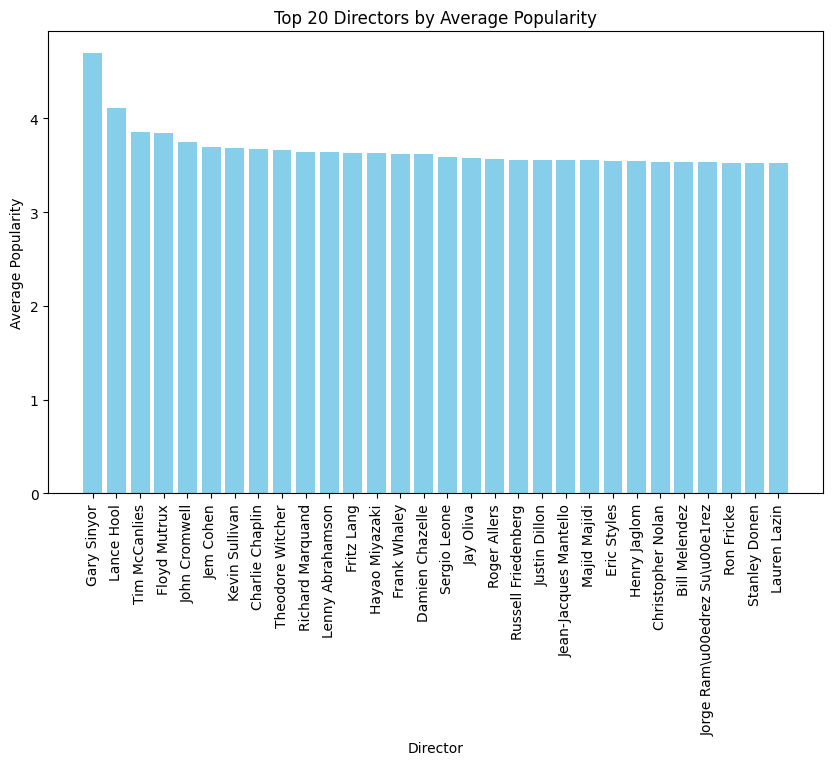

In [110]:
# Plot for top20 directos by their average popularity.

# Group by 'Director' and calculate the average popularity
director_avg_popularity = movies_df.groupby('director')['Weighted_Popularity'].mean().reset_index()

# Sort the directors based on average popularity in descending order
sorted_directors = director_avg_popularity.sort_values(by='Weighted_Popularity', ascending=False).head(30)

# Create the bar chart for the top 20 directors
plt.figure(figsize=(10, 6))
plt.bar(sorted_directors['director'], sorted_directors['Weighted_Popularity'], color='skyblue')
plt.xlabel('Director')
plt.ylabel('Average Popularity')
plt.title('Top 20 Directors by Average Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
